# みはらのけんきゅー_EDA(探索的データ分析)と可視化
---

In [ ]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import sys
print(sys.version)


3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [2]:
import pandas as pd
from pandas import Series,DataFrame

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns

In [6]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blinker                          1.4
bl

In [4]:
import platform

# OSの情報を表示
print("OS:", platform.system())
print("OS バージョン:", platform.version())

# CPUの情報を表示
import os
os.system("cat /proc/cpuinfo")


OS: Linux
OS バージョン: #1 SMP Fri Jun 9 10:57:30 UTC 2023


0

## モジュールを環境にインストール

In [5]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 5.5 MB/s eta 0:00:00


In [ ]:
!pip uninstall pandas_profiling
#!pip install -U pandas_profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     / 22.6 MB 21.9 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 29.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=353021 sha256=931dff5c7ddb8745abcc35fa9c56f8d48b1c7bf129d2cb1f15b51511f76f3351
  Stored in directory: /tmp/pip-ephem-wheel-cache-orefre3n/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b295e0c0b70e5cdccd39be26ab72cea03d1f0ee9bcb9bd50cf5bc2fc9043fc30
  Stored in directory: /roo

## データの作成

### ライブラリのインポート

In [ ]:
#モジュールの読み込み
from __future__ import print_function

import pandas as pd
from pandas import Series,DataFrame

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns

import time

#import pandas_profiling as pdp

### エクセルデータを編集（特徴量エンジニアリング）

In [ ]:
df = pd.read_excel('drive/MyDrive/見原/Data/general_data_openstack_bugs-2021-06-27.xlsx')

In [ ]:
df['Opened'] = pd.to_datetime(df['Opened'], format='%Y-%m-%d %H:%M:%S')
df['Changed'] = pd.to_datetime(df['Changed'], format='%Y-%m-%d %H:%M:%S')
df.head(10)

,Bug ID,Opened,Unnamed: 2,Changed,Unnamed: 4,Reporter,Unnamed: 6,Assignee,Unnamed: 8,Product,...,OS,Unnamed: 20,Severity,Unnamed: 22,Version,Unnamed: 24,Summary,Unnamed: 26,output,hour
0,856263,2012-09-11 15:03:44,NaN,2016-04-26 22:17:15,NaN,Daniel Berrangﾃｩ,0.001250,Daniel Berrangﾃｩ,0.001526,Red Hat OpenStack,...,Unspecified,0.753589,unspecified,0.166009,2.0 (Folsom),0.019299,Fix libvirt auth callback to allow for use of ...,78,NaN,0.000000
1,861492,2012-09-28 19:53:40,17.201343,2016-04-22 05:01:41,0.000000,Dan Yocum,0.002880,Nikola Dipanov,0.005721,Red Hat OpenStack,...,Linux,0.218226,unspecified,0.166009,1.0 (Essex),0.002524,live migration fails to migrate iptable rules ...,57,17.201343,412.832222
2,861516,2012-09-28 21:53:40,0.083333,2013-07-04 02:51:13,0.000000,Dan Yocum,0.002880,RHOS Maint,0.095075,Red Hat OpenStack,...,Unspecified,0.753589,unspecified,0.166009,1.0 (Essex),0.002524,compute_nodes not being properly updated,40,0.083333,2.000000
3,862322,2012-10-02 15:47:52,3.745972,2019-09-10 14:12:01,2259.472778,Dan Yocum,0.002880,Matthias Runge,0.003541,Red Hat OpenStack,...,Unspecified,0.753589,unspecified,0.166009,1.0 (Essex),0.002524,"Normal users can't view ""settings""",34,3.745972,89.903333
4,865924,2012-10-12 20:06:31,10.179618,2013-02-06 20:21:23,0.000000,Dan Yocum,0.002880,RHOS Maint,0.095075,Red Hat OpenStack,...,Unspecified,0.753589,unspecified,0.166009,1.0 (Essex),0.002524,"terminate instance doesn't - ""Not Authorized"" ...",69,10.179618,244.310833
5,867029,2012-10-16 15:08:26,3.792998,2012-12-10 21:03:02,0.000000,Alan Pevec,0.002337,Alan Pevec,0.002942,Red Hat OpenStack,...,Unspecified,0.753589,unspecified,0.166009,1.0 (Essex),0.002524,Update to the latest Essex stable release 2012...,50,3.792998,91.031944
6,867035,2012-10-16 15:18:13,0.006794,2016-04-22 05:01:41,1228.332396,Alan Pevec,0.002337,Nikola Dipanov,0.005721,Red Hat OpenStack,...,Unspecified,0.753589,unspecified,0.166009,1.0 (Essex),0.002524,Update to the latest Essex stable release 2012...,50,0.006794,0.163056
7,877703,2012-11-18 06:17:35,32.624560,2013-07-04 02:53:39,0.000000,Etsuji Nakai,0.000326,Alan Pevec,0.002942,Red Hat OpenStack,...,Unspecified,0.753589,unspecified,0.166009,2.0 (Folsom),0.019299,Linux Bridge NAT doesn't work due to net.bridg...,73,32.624560,782.989444
8,877792,2012-11-18 20:39:38,0.598646,2016-04-26 13:30:28,1027.442234,Etsuji Nakai,0.000326,Gary Kotton,0.002997,Red Hat OpenStack,...,Unspecified,0.753589,unspecified,0.166009,2.0 (Folsom),0.019299,LinuxBridge plugin doesn't preserve the order ...,96,0.598646,14.367500
9,880980,2012-11-28 10:17:15,9.567789,2013-07-04 02:54:47,0.000000,Sandro Mathys,0.000054,RHOS Maint,0.095075,Red Hat OpenStack,...,Unspecified,0.753589,unspecified,0.166009,2.0 (Folsom),0.019299,Unable to authorize user / Exception RuntimeEr...,150,9.567789,229.626944


In [ ]:
df_2 = pd.DataFrame(df[["Bug ID","Opened","Changed","Reporter",
                       "Assignee","Product","Component","Status",
                       "Resolution","Hardware","OS","Severity",
                       "Version","Summary"
                       ]])
print("\n\n")
print(df_2.info())
print("\n\n")
print("欠損の確認")
print(df_2.isna().sum())
#後にラベルエンコーディングをするとき、0から数字が降られるので、欠損補完
df_2[["Reporter","Assignee"]] = df_2[["Reporter","Assignee"]].fillna("Unknown", inplace=False)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19017 entries, 0 to 19016
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Bug ID      19017 non-null  int64         
 1   Opened      19017 non-null  datetime64[ns]
 2   Changed     19017 non-null  datetime64[ns]
 3   Reporter    18401 non-null  object        
 4   Assignee    18354 non-null  object        
 5   Product     19017 non-null  object        
 6   Component   19017 non-null  object        
 7   Status      19017 non-null  object        
 8   Resolution  19017 non-null  object        
 9   Hardware    19017 non-null  object        
 10  OS          19017 non-null  object        
 11  Severity    19017 non-null  object        
 12  Version     19017 non-null  object        
 13  Summary     19017 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(11)
memory usage: 2.0+ MB
None



欠損の確認
Bug ID          0
Opened          0


In [ ]:
# Openedを日付順に変更
df_3 = df_2.sort_values('Opened')
df_3.head()

,Bug ID,Opened,Changed,Reporter,Assignee,Product,Component,Status,Resolution,Hardware,OS,Severity,Version,Summary
17416,833398,2012-06-19 12:13:14,2019-09-09 16:04:58,David Naori,Xavier Queralt,Red Hat OpenStack,openstack-nova,CLOSED,UPSTREAM,Unspecified,Unspecified,low,1.0 (Essex),[RFE][nova][preformance] qemu-img info command...
2940,835466,2012-06-26 09:27:15,2013-07-04 02:47:20,David Naori,Alan Pevec,Red Hat OpenStack,openstack-nova,CLOSED,CURRENTRELEASE,x86_64,Linux,high,1.0 (Essex),[nova] injection of ssh authorized_keys someti...
13444,842136,2012-07-22 13:41:36,2019-09-09 16:10:30,David Naori,Brent Eagles,Red Hat OpenStack,openstack-nova,CLOSED,ERRATA,Unspecified,Unspecified,medium,1.0 (Essex),[nova][RFE][Resize|Migrate][preformance] avoid...
8029,847785,2012-08-13 14:36:41,2016-04-26 17:07:08,Gary Kotton,Alan Pevec,Red Hat OpenStack,openstack-quantum,CLOSED,ERRATA,Unspecified,Unspecified,high,1.0 (Essex),Quantum installation scripts for linux bridge ...
13445,856149,2012-09-11 10:20:48,2016-04-26 16:18:01,Daniel Berrangﾃｩ,RHOS Maint,Red Hat OpenStack,openstack-quantum,CLOSED,CURRENTRELEASE,Unspecified,Unspecified,medium,2.0 (Folsom),Need to provide a formal API for Nova to use t...


In [ ]:
# 値がすべて同じカラムは削除
unique_counts = df_3.nunique()
same_value_columns = unique_counts[unique_counts == 1].index.tolist()
df_4 = df_3.drop(same_value_columns, axis=1)
df_4.head()

,Bug ID,Opened,Changed,Reporter,Assignee,Component,Resolution,Hardware,OS,Severity,Version,Summary
17416,833398,2012-06-19 12:13:14,2019-09-09 16:04:58,David Naori,Xavier Queralt,openstack-nova,UPSTREAM,Unspecified,Unspecified,low,1.0 (Essex),[RFE][nova][preformance] qemu-img info command...
2940,835466,2012-06-26 09:27:15,2013-07-04 02:47:20,David Naori,Alan Pevec,openstack-nova,CURRENTRELEASE,x86_64,Linux,high,1.0 (Essex),[nova] injection of ssh authorized_keys someti...
13444,842136,2012-07-22 13:41:36,2019-09-09 16:10:30,David Naori,Brent Eagles,openstack-nova,ERRATA,Unspecified,Unspecified,medium,1.0 (Essex),[nova][RFE][Resize|Migrate][preformance] avoid...
8029,847785,2012-08-13 14:36:41,2016-04-26 17:07:08,Gary Kotton,Alan Pevec,openstack-quantum,ERRATA,Unspecified,Unspecified,high,1.0 (Essex),Quantum installation scripts for linux bridge ...
13445,856149,2012-09-11 10:20:48,2016-04-26 16:18:01,Daniel Berrangﾃｩ,RHOS Maint,openstack-quantum,CURRENTRELEASE,Unspecified,Unspecified,medium,2.0 (Folsom),Need to provide a formal API for Nova to use t...


In [ ]:
#"TBF"は"Time Between Failures"（故障時間）
#"TTR"は"Time To Repair"       （修正時間）

df_4["TTR"] = (df_4['Changed'] - df_4['Opened']).dt.days #日数
df_4["TTR_2"] = (df_4['Changed'] - df_4['Opened']).dt.components['hours'] + df_4["TTR"]*24 #時間
df_4["TBF"] = (df_4['Opened'] - df_4['Opened'].shift(1)).dt.days #日数
df_4["TBF_2"] = (df_4['Opened'] - df_4['Opened'].shift(1)).dt.components['hours'] + df_4["TBF"]*24 #時間
df_4['days'] = df_4['Opened'].dt.day
df_4['month'] = df_4['Opened'].dt.month
df_4['year'] = df_4['Opened'].dt.year

#データの整理
df_4 = df_4.drop(17416)
# インデックスがぐちゃぐちゃだから戻した
df_4 = df_4.reset_index(drop = True)
df_4.head(3)


,Bug ID,Opened,Changed,Reporter,Assignee,Component,Resolution,Hardware,OS,Severity,Version,Summary,TTR,TTR_2,TBF,TBF_2,days,month,year
0,835466,2012-06-26 09:27:15,2013-07-04 02:47:20,David Naori,Alan Pevec,openstack-nova,CURRENTRELEASE,x86_64,Linux,high,1.0 (Essex),[nova] injection of ssh authorized_keys someti...,372,8945,6.0,165.0,26,6,2012
1,842136,2012-07-22 13:41:36,2019-09-09 16:10:30,David Naori,Brent Eagles,openstack-nova,ERRATA,Unspecified,Unspecified,medium,1.0 (Essex),[nova][RFE][Resize|Migrate][preformance] avoid...,2605,62522,26.0,628.0,22,7,2012
2,847785,2012-08-13 14:36:41,2016-04-26 17:07:08,Gary Kotton,Alan Pevec,openstack-quantum,ERRATA,Unspecified,Unspecified,high,1.0 (Essex),Quantum installation scripts for linux bridge ...,1352,32450,22.0,528.0,13,8,2012


In [ ]:
# "Opened"をインデックスにセットして、データに曜日情報を追加
df_5 = df_4.set_index(['Opened'])
df_5['Weekday'] = df_5.index.strftime('%A')
df_5 = df_5.reset_index(drop = False)
df_5["index"] = df_5.index
df_5.head(3)

,Opened,Bug ID,Changed,Reporter,Assignee,Component,Resolution,Hardware,OS,Severity,...,Summary,TTR,TTR_2,TBF,TBF_2,days,month,year,Weekday,index
0,2012-06-26 09:27:15,835466,2013-07-04 02:47:20,David Naori,Alan Pevec,openstack-nova,CURRENTRELEASE,x86_64,Linux,high,...,[nova] injection of ssh authorized_keys someti...,372,8945,6.0,165.0,26,6,2012,Tuesday,0
1,2012-07-22 13:41:36,842136,2019-09-09 16:10:30,David Naori,Brent Eagles,openstack-nova,ERRATA,Unspecified,Unspecified,medium,...,[nova][RFE][Resize|Migrate][preformance] avoid...,2605,62522,26.0,628.0,22,7,2012,Sunday,1
2,2012-08-13 14:36:41,847785,2016-04-26 17:07:08,Gary Kotton,Alan Pevec,openstack-quantum,ERRATA,Unspecified,Unspecified,high,...,Quantum installation scripts for linux bridge ...,1352,32450,22.0,528.0,13,8,2012,Monday,2


In [ ]:
# encoding_column = ["Reporter", "Assignee", "Component", "Resolution",
#                   "Hardware", "OS", "Severity", "Version", "Weekday"]

# for column in encoding_column:
#     freq_encoding = df_5[column].value_counts(normalize=True).to_dict()
#     df_5[column] = df_5[column].map(freq_encoding)

# df_5.head(3)

,Opened,Bug ID,Changed,Reporter,Assignee,Component,Resolution,Hardware,OS,Severity,...,Summary,TBF,TBF_2,TTR,TTR_2,days,month,year,Weekday,index
0,2012-06-26 09:27:15,835466,2013-07-04 02:47:20,0.000105,0.002840,0.155764,0.096393,0.15082,0.218237,0.316576,...,[nova] injection of ssh authorized_keys someti...,372,8945,6.0,165.0,26,6,2012,0.193521,0
1,2012-07-22 13:41:36,842136,2019-09-09 16:10:30,0.000105,0.011096,0.155764,0.463767,0.77724,0.753576,0.263199,...,[nova][RFE][Resize|Migrate][preformance] avoid...,2605,62522,26.0,628.0,22,7,2012,0.041754,1
2,2012-08-13 14:36:41,847785,2016-04-26 17:07:08,0.002840,0.002840,0.005574,0.463767,0.77724,0.753576,0.316576,...,Quantum installation scripts for linux bridge ...,1352,32450,22.0,528.0,13,8,2012,0.169804,2


In [ ]:
# 欠損の確認
print("Nanの確認")
print(df_5.isna().sum())

Nanの確認
Opened        0
Bug ID        0
Changed       0
Reporter      0
Assignee      0
Component     0
Resolution    0
Hardware      0
OS            0
Severity      0
Version       0
Summary       0
TTR           0
TTR_2         0
TBF           0
TBF_2         0
days          0
month         0
year          0
Weekday       0
index         0
dtype: int64


In [ ]:
from tsfresh import extract_features

features = extract_features(df_5[["TBF","index"]], column_id="index")
features

Feature Extraction: 100%|██████████| 19016/19016 [11:16<00:00, 28.09it/s]


,TBF__variance_larger_than_standard_deviation,TBF__has_duplicate_max,TBF__has_duplicate_min,TBF__has_duplicate,TBF__sum_values,TBF__abs_energy,TBF__mean_abs_change,TBF__mean_change,TBF__mean_second_derivative_central,TBF__median,...,TBF__fourier_entropy__bins_5,TBF__fourier_entropy__bins_10,TBF__fourier_entropy__bins_100,TBF__permutation_entropy__dimension_3__tau_1,TBF__permutation_entropy__dimension_4__tau_1,TBF__permutation_entropy__dimension_5__tau_1,TBF__permutation_entropy__dimension_6__tau_1,TBF__permutation_entropy__dimension_7__tau_1,TBF__query_similarity_count__query_None__threshold_0.0,TBF__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,6.0,36.0,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,26.0,676.0,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,22.0,484.0,NaN,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,28.0,784.0,NaN,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19011,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19012,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19013,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19014,0.0,0.0,0.0,0.0,2.0,4.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Nanとかの補完
from tsfresh.utilities.dataframe_functions import impute

df_features = impute(features)
df_features

/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['TBF__mean_abs_change' 'TBF__mean_change'
 'TBF__mean_second_derivative_central' 'TBF__skewness' 'TBF__kurtosis'
 'TBF__sample_entropy' 'TBF__autocorrelation__lag_0'
 'TBF__autocorrelation__lag_1' 'TBF__autocorrelation__lag_2'
 'TBF__autocorrelation__lag_3' 'TBF__autocorrelation__lag_4'
 'TBF__autocorrelation__lag_5' 'TBF__autocorrelation__lag_6'
 'TBF__autocorrelation__lag_7' 'TBF__autocorrelation__lag_8'
 'TBF__autocorrelation__lag_9' 'TBF__partial_autocorrelation__lag_0'
 'TBF__partial_autocorrelation__lag_1'
 'TBF__partial_autocorrelation__lag_2'
 'TBF__partial_autocorrelation__lag_3'
 'TBF__partial_autocorrelation__lag_4'
 'TBF__partial_autocorrelation__lag_5'
 'TBF__partial_autocorrelation__lag_6'
 'TBF__partial_autocorrelation__lag_7'
 'TBF__partial_autocorrelation__lag_8'
 'TBF__partial_autocorrelation__lag_9'
 'TBF__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10

,TBF__variance_larger_than_standard_deviation,TBF__has_duplicate_max,TBF__has_duplicate_min,TBF__has_duplicate,TBF__sum_values,TBF__abs_energy,TBF__mean_abs_change,TBF__mean_change,TBF__mean_second_derivative_central,TBF__median,...,TBF__fourier_entropy__bins_5,TBF__fourier_entropy__bins_10,TBF__fourier_entropy__bins_100,TBF__permutation_entropy__dimension_3__tau_1,TBF__permutation_entropy__dimension_4__tau_1,TBF__permutation_entropy__dimension_5__tau_1,TBF__permutation_entropy__dimension_6__tau_1,TBF__permutation_entropy__dimension_7__tau_1,TBF__query_similarity_count__query_None__threshold_0.0,TBF__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,6.0,36.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,26.0,676.0,0.0,0.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,22.0,484.0,0.0,0.0,0.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,28.0,784.0,0.0,0.0,0.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19013,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19014,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
"""
# データのスケーリング
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(extracted_features)

# スケーリング後のデータをデータフレームに変換
scaled_df = pd.DataFrame(scaled_data, columns=extracted_features.columns)

# データのクリーニング
imputer = SimpleImputer(strategy='mean')  # 欠損値を平均値で補完する場合
cleaned_data = imputer.fit_transform(scaled_df)

# クリーニング後のデータをデータフレームに変換
cleaned_df = pd.DataFrame(cleaned_data, columns=scaled_df.columns)

"""

"\n# データのスケーリング\nscaler = MinMaxScaler()\nscaled_data = scaler.fit_transform(extracted_features)\n\n# スケーリング後のデータをデータフレームに変換\nscaled_df = pd.DataFrame(scaled_data, columns=extracted_features.columns)\n\n# データのクリーニング\nimputer = SimpleImputer(strategy='mean')  # 欠損値を平均値で補完する場合\ncleaned_data = imputer.fit_transform(scaled_df)\n\n# クリーニング後のデータをデータフレームに変換\ncleaned_df = pd.DataFrame(cleaned_data, columns=scaled_df.columns)\n\n"

In [ ]:
df_features_2 = pd.concat([df_5[["TTR","Opened"]], df_features], axis=1)
df_features_3 = df_features_2.set_index(["Opened"])
df_features_3

,TTR,TBF__variance_larger_than_standard_deviation,TBF__has_duplicate_max,TBF__has_duplicate_min,TBF__has_duplicate,TBF__sum_values,TBF__abs_energy,TBF__mean_abs_change,TBF__mean_change,TBF__mean_second_derivative_central,...,TBF__fourier_entropy__bins_5,TBF__fourier_entropy__bins_10,TBF__fourier_entropy__bins_100,TBF__permutation_entropy__dimension_3__tau_1,TBF__permutation_entropy__dimension_4__tau_1,TBF__permutation_entropy__dimension_5__tau_1,TBF__permutation_entropy__dimension_6__tau_1,TBF__permutation_entropy__dimension_7__tau_1,TBF__query_similarity_count__query_None__threshold_0.0,TBF__mean_n_absolute_max__number_of_maxima_7
Opened,,,,,,,,,,,,,,,,,,,,,
2012-06-26 09:27:15,372,0.0,0.0,0.0,0.0,6.0,36.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-22 13:41:36,2605,0.0,0.0,0.0,0.0,26.0,676.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-13 14:36:41,1352,0.0,0.0,0.0,0.0,22.0,484.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-09-11 10:20:48,1323,0.0,0.0,0.0,0.0,28.0,784.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-09-11 15:03:44,1323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16 19:36:17,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-17 08:31:28,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-18 10:53:34,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#ランダムシード固定
from sklearn.utils import check_random_state
import random
seed = 42
random_state = check_random_state(seed)
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state=random_state)

#説明変数
x = pd.DataFrame(df_features_3.drop(["TTR"],axis=1))# .drop(["hogehoge"]で、"hogehoge"をドロップしてる

#目的変数
y = pd.DataFrame(df_features_3["TTR"])# ["hogehoge"]のカラムを"y"に代入

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1, shuffle=False, random_state=random_state)

RF_model.fit(x_train, y_train)
importances = RF_model.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 27  # 上位N個の特徴量を選択する例
selected_features = x_train.columns[indices][:top_n]

<ipython-input-17-81b6ae05419c>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(x_train, y_train)


<ipython-input-18-4755d04e30c2>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


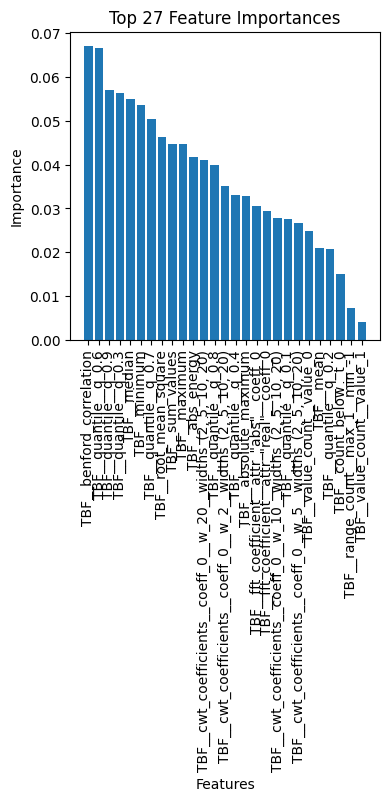

In [ ]:
# 上位N個の特徴量の重要度と特徴量名を取得
top_n = 27
top_features = x_train.columns[indices][:top_n]
top_importances = importances[indices][:top_n]

# 縦長の棒グラフで重要度を可視化（重要度の大きい順）
plt.figure(figsize=(4, 4))
plt.bar(range(top_n), top_importances[::1])
plt.xticks(range(top_n), top_features[::1], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top {} Feature Importances'.format(top_n))
plt.tight_layout()
plt.show()


In [ ]:
# Openedをインデックスに指定
df_6 = df_5.set_index(["Opened"])
# df_6 = pd.DataFrame(df_6.drop(["index"],axis=1))
df_6.head(3)

,Bug ID,Changed,Reporter,Assignee,Component,Resolution,Hardware,OS,Severity,Version,Summary,TTR,TTR_2,TBF,TBF_2,days,month,year,Weekday,index
Opened,,,,,,,,,,,,,,,,,,,,
2012-06-26 09:27:15,835466,2013-07-04 02:47:20,David Naori,Alan Pevec,openstack-nova,CURRENTRELEASE,x86_64,Linux,high,1.0 (Essex),[nova] injection of ssh authorized_keys someti...,372,8945,6.0,165.0,26,6,2012,Tuesday,0
2012-07-22 13:41:36,842136,2019-09-09 16:10:30,David Naori,Brent Eagles,openstack-nova,ERRATA,Unspecified,Unspecified,medium,1.0 (Essex),[nova][RFE][Resize|Migrate][preformance] avoid...,2605,62522,26.0,628.0,22,7,2012,Sunday,1
2012-08-13 14:36:41,847785,2016-04-26 17:07:08,Gary Kotton,Alan Pevec,openstack-quantum,ERRATA,Unspecified,Unspecified,high,1.0 (Essex),Quantum installation scripts for linux bridge ...,1352,32450,22.0,528.0,13,8,2012,Monday,2


In [ ]:
top_features2 = x.iloc[:, indices[:top_n]]
top_features2.head(3)

,TBF__benford_correlation,TBF__quantile__q_0.6,TBF__quantile__q_0.9,TBF__quantile__q_0.3,TBF__median,TBF__minimum,TBF__quantile__q_0.7,TBF__root_mean_square,TBF__sum_values,TBF__maximum,...,"TBF__fft_coefficient__attr_""real""__coeff_0","TBF__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)",TBF__quantile__q_0.1,"TBF__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)",TBF__value_count__value_0,TBF__mean,TBF__quantile__q_0.2,TBF__count_below__t_0,TBF__range_count__max_1__min_-1,TBF__value_count__value_1
Opened,,,,,,,,,,,,,,,,,,,,,
2012-06-26 09:27:15,-0.200946,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,1.645634,6.0,2.327277,0.0,6.0,6.0,0.0,0.0,0.0
2012-07-22 13:41:36,0.295657,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,...,26.0,7.131079,26.0,10.084869,0.0,26.0,26.0,0.0,0.0,0.0
2012-08-13 14:36:41,0.295657,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,...,22.0,6.033990,22.0,8.533350,0.0,22.0,22.0,0.0,0.0,0.0


In [ ]:
# tsfresh の特徴量を、元のデータセットに結合
df_features_4 = df_6.join(top_features2)
df_features_4

,Bug ID,Changed,Reporter,Assignee,Component,Resolution,Hardware,OS,Severity,Version,...,"TBF__fft_coefficient__attr_""real""__coeff_0","TBF__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)",TBF__quantile__q_0.1,"TBF__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)",TBF__value_count__value_0,TBF__mean,TBF__quantile__q_0.2,TBF__count_below__t_0,TBF__range_count__max_1__min_-1,TBF__value_count__value_1
Opened,,,,,,,,,,,,,,,,,,,,,
2012-06-26 09:27:15,835466,2013-07-04 02:47:20,David Naori,Alan Pevec,openstack-nova,CURRENTRELEASE,x86_64,Linux,high,1.0 (Essex),...,6.0,1.645634,6.0,2.327277,0.0,6.0,6.0,0.0,0.0,0.0
2012-07-22 13:41:36,842136,2019-09-09 16:10:30,David Naori,Brent Eagles,openstack-nova,ERRATA,Unspecified,Unspecified,medium,1.0 (Essex),...,26.0,7.131079,26.0,10.084869,0.0,26.0,26.0,0.0,0.0,0.0
2012-08-13 14:36:41,847785,2016-04-26 17:07:08,Gary Kotton,Alan Pevec,openstack-quantum,ERRATA,Unspecified,Unspecified,high,1.0 (Essex),...,22.0,6.033990,22.0,8.533350,0.0,22.0,22.0,0.0,0.0,0.0
2012-09-11 10:20:48,856149,2016-04-26 16:18:01,Daniel Berrangﾃｩ,RHOS Maint,openstack-quantum,CURRENTRELEASE,Unspecified,Unspecified,medium,2.0 (Folsom),...,28.0,7.679624,28.0,10.860628,0.0,28.0,28.0,0.0,0.0,0.0
2012-09-11 15:03:44,856263,2016-04-26 22:17:15,Daniel Berrangﾃｩ,Daniel Berrangﾃｩ,openstack-nova,ERRATA,Unspecified,Unspecified,unspecified,2.0 (Folsom),...,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16 19:36:17,1972877,2021-06-22 18:00:51,Andrew Mercer,Unknown,openstack-nova,WONTFIX,Unspecified,Unspecified,unspecified,16.1 (Train),...,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,1.0,1.0,0.0
2021-06-17 08:31:28,1973073,2021-06-25 14:35:38,vivek koul,Martin Magr,openstack-ceilometer,NOTABUG,Unspecified,Unspecified,high,13.0 (Queens),...,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,1.0,1.0,0.0
2021-06-18 10:53:34,1973635,2021-06-18 12:26:38,Unknown,Unknown,openstack-nova,DUPLICATE,x86_64,Linux,medium,16.1 (Train),...,1.0,0.274272,1.0,0.387880,0.0,1.0,1.0,0.0,0.0,1.0


### CSVの場合

In [ ]:
#CSVファイルの読み込み
data_set = pd.read_csv("drive/MyDrive/見原/general_data.csv",sep=",",header=0)

### 最終的なデータセットの完成

In [ ]:
#data_set = pd.DataFrame(df_5.drop(["Changed","Summary"],axis=1))

# data_set = pd.DataFrame(df_features_4.drop(["Changed","Summary"],axis=1))

data_set = df_features_4.copy()

In [ ]:
import re

def extract_columns_with_special_characters(columns):
    pattern = r'[^\w\s]'
    special_columns = []

    for column in columns:
        if re.search(pattern, column):
            special_columns.append(column)

    return special_columns


In [ ]:
columns = data_set.columns

special_columns = extract_columns_with_special_characters(columns)

print(special_columns)


['TBF__quantile__q_0.6', 'TBF__quantile__q_0.9', 'TBF__quantile__q_0.3', 'TBF__quantile__q_0.7', 'TBF__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)', 'TBF__quantile__q_0.8', 'TBF__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)', 'TBF__quantile__q_0.4', 'TBF__fft_coefficient__attr_"abs"__coeff_0', 'TBF__fft_coefficient__attr_"real"__coeff_0', 'TBF__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)', 'TBF__quantile__q_0.1', 'TBF__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)', 'TBF__quantile__q_0.2', 'TBF__range_count__max_1__min_-1']


In [ ]:
def remove_special_characters(column):
    pattern = r'[^\w\s]'
    clean_column = re.sub(pattern, '', column)
    return clean_column


In [ ]:
column_with_special_chars = "special_column!"
clean_column = remove_special_characters(column_with_special_chars)

print(clean_column)


special_column


In [ ]:
# カラム名を特殊文字を削除したカラム名に変更する
new_columns = {}
for column in data_set.columns:
    new_column = remove_special_characters(column)
    new_columns[column] = new_column

data_set2 = data_set.rename(columns=new_columns)

display(data_set2)

,Bug ID,Changed,Reporter,Assignee,Component,Resolution,Hardware,OS,Severity,Version,...,TBF__fft_coefficient__attr_real__coeff_0,TBF__cwt_coefficients__coeff_0__w_10__widths_2 5 10 20,TBF__quantile__q_01,TBF__cwt_coefficients__coeff_0__w_5__widths_2 5 10 20,TBF__value_count__value_0,TBF__mean,TBF__quantile__q_02,TBF__count_below__t_0,TBF__range_count__max_1__min_1,TBF__value_count__value_1
Opened,,,,,,,,,,,,,,,,,,,,,
2012-06-26 09:27:15,835466,2013-07-04 02:47:20,David Naori,Alan Pevec,openstack-nova,CURRENTRELEASE,x86_64,Linux,high,1.0 (Essex),...,6.0,1.645634,6.0,2.327277,0.0,6.0,6.0,0.0,0.0,0.0
2012-07-22 13:41:36,842136,2019-09-09 16:10:30,David Naori,Brent Eagles,openstack-nova,ERRATA,Unspecified,Unspecified,medium,1.0 (Essex),...,26.0,7.131079,26.0,10.084869,0.0,26.0,26.0,0.0,0.0,0.0
2012-08-13 14:36:41,847785,2016-04-26 17:07:08,Gary Kotton,Alan Pevec,openstack-quantum,ERRATA,Unspecified,Unspecified,high,1.0 (Essex),...,22.0,6.033990,22.0,8.533350,0.0,22.0,22.0,0.0,0.0,0.0
2012-09-11 10:20:48,856149,2016-04-26 16:18:01,Daniel Berrangﾃｩ,RHOS Maint,openstack-quantum,CURRENTRELEASE,Unspecified,Unspecified,medium,2.0 (Folsom),...,28.0,7.679624,28.0,10.860628,0.0,28.0,28.0,0.0,0.0,0.0
2012-09-11 15:03:44,856263,2016-04-26 22:17:15,Daniel Berrangﾃｩ,Daniel Berrangﾃｩ,openstack-nova,ERRATA,Unspecified,Unspecified,unspecified,2.0 (Folsom),...,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16 19:36:17,1972877,2021-06-22 18:00:51,Andrew Mercer,Unknown,openstack-nova,WONTFIX,Unspecified,Unspecified,unspecified,16.1 (Train),...,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,1.0,1.0,0.0
2021-06-17 08:31:28,1973073,2021-06-25 14:35:38,vivek koul,Martin Magr,openstack-ceilometer,NOTABUG,Unspecified,Unspecified,high,13.0 (Queens),...,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,1.0,1.0,0.0
2021-06-18 10:53:34,1973635,2021-06-18 12:26:38,Unknown,Unknown,openstack-nova,DUPLICATE,x86_64,Linux,medium,16.1 (Train),...,1.0,0.274272,1.0,0.387880,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
import pickle
folder_path = "drive/MyDrive/見原/Data/"
data_set2.to_pickle(folder_path + 'data_set.pkl')

In [ ]:
import pickle
# 読み込むpickleファイルのパス
folder_path = "drive/MyDrive/見原/Data/data_set.pkl"

# pickleファイルを読み込む
with open(folder_path, 'rb') as file:
    data_set = pickle.load(file)

# 読み込んだDataFrameの表示
display(data_set.tail(3))
data_set = pd.DataFrame(data_set.drop(["Changed","Summary"],axis=1))

,Bug ID,Changed,Reporter,Assignee,Component,Resolution,Hardware,OS,Severity,Version,...,TBF__fft_coefficient__attr_real__coeff_0,TBF__cwt_coefficients__coeff_0__w_10__widths_2 5 10 20,TBF__quantile__q_01,TBF__cwt_coefficients__coeff_0__w_5__widths_2 5 10 20,TBF__value_count__value_0,TBF__mean,TBF__quantile__q_02,TBF__count_below__t_0,TBF__range_count__max_1__min_1,TBF__value_count__value_1
Opened,,,,,,,,,,,,,,,,,,,,,
2021-06-18 10:53:34,1973635,2021-06-18 12:26:38,Unknown,Unknown,openstack-nova,DUPLICATE,x86_64,Linux,medium,16.1 (Train),...,1.0,0.274272,1.0,0.387880,0.0,1.0,1.0,0.0,0.0,1.0
2021-06-21 06:28:11,1974195,2021-06-23 15:58:08,Shailesh Chhabdiya,Lee Yarwood,openstack-nova,DUPLICATE,All,Linux,high,13.0 (Queens),...,2.0,0.548545,2.0,0.775759,0.0,2.0,2.0,0.0,0.0,0.0
2021-06-22 16:29:20,1974856,2021-06-22 21:21:55,Matt Flusche,Unknown,openstack-nova,NOTABUG,x86_64,Linux,high,13.0 (Queens),...,1.0,0.274272,1.0,0.387880,0.0,1.0,1.0,0.0,0.0,1.0
